In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("customer_churn-2.csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# null check
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# checks duplicates
data.duplicated().sum()

0

In [9]:
# check the statastical info
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
data.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [11]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [94]:
#Perfrom EDA Data Manupulation
#● Extract the 5th column and store it in ‘customer_5’
customer_5=data.iloc[:,4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [96]:
#● Extract the 15th column and store it in ‘customer_15’
customer_15=data.iloc[:,14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [14]:
# ● Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

senior_male_electronic=data[(data["SeniorCitizen"]==1)&(data["gender"]=="Male")&(data["PaymentMethod"]=="Electronic check")]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [15]:
#● Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in
#‘customer_total_tenure’
customer_total_tenure=data[(data["tenure"]>70)|(data["MonthlyCharges"]>100)]

customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [16]:
#● Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in
#two_mail_yes
two_mail_yes=data[(data["Contract"]=="Two year")&(data["PaymentMethod"]=="Mailed check")&(data["Churn"]=="Yes")]

In [17]:
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [18]:
#● Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’

customer_333=data.sample(333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6205,7547-EKNFS,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),95.25,3959.35,Yes
6218,8821-KVZKQ,Female,0,Yes,Yes,70,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),58.40,4113.15,No
4073,7683-CBDKJ,Male,0,Yes,Yes,14,Yes,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,65.45,937.6,Yes
1973,9675-ICXCT,Male,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,80.80,5728.55,No
346,2034-GDRCN,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.40,168.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,0788-DXBFY,Male,0,Yes,Yes,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.55,1108.8,No
2449,1357-MVDOZ,Male,0,Yes,Yes,11,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),59.65,683.25,No
6367,0848-SOMKO,Male,0,No,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),48.40,3442.8,No
1895,3638-VBZTA,Male,0,No,Yes,68,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),86.50,5882.75,No


In [19]:
#● Get the count of different levels from the ‘Churn’ column
c=data["Churn"].value_counts().keys()
c

Index(['No', 'Yes'], dtype='object', name='Churn')

In [20]:
#2. Data Visualization:
#● Build a bar-plot for the ’InternetService’ column:
#a. Set x-axis label to ‘Categories of Internet Service’
#b. Set y-axis label to ‘Count of Categories’
#c. Set the title of plot to be ‘Distribution of Internet Service’
#d. Set the color of the bars to be ‘orange’



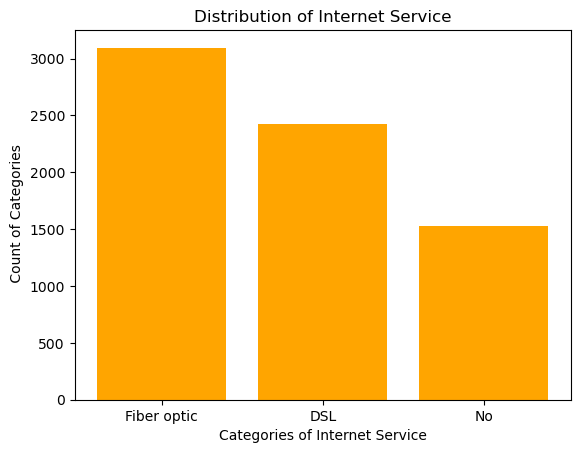

In [21]:
x=data["InternetService"].value_counts().keys()
y=data["InternetService"].value_counts()
plt.bar(x,y,color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel(" Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

Text(0.5, 1.0, 'Distribution of Tenure')

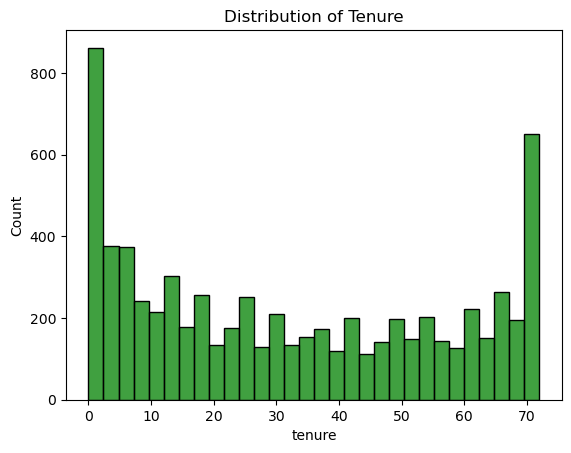

In [22]:
#● Build a histogram for the ‘tenure’ column:
#a. Set the number of bins to be 30
#b. Set the color of the bins to be ‘green’
#c. Assign the title ‘Distribution of tenure’
sns.histplot(data["tenure"],bins=30,color="green")
plt.title("Distribution of Tenure")



In [23]:
#● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:

#a. Assign the points a color of ‘brown’
#b. Set the x-axis label to ‘Tenure of customer’
#c. Set the y-axis label to ‘Monthly Charges of customer’
#d. Set the title to ‘Tenure vs Monthly Charges’
#e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y axis and
#f. Contract on the x axis


Text(0.5, 1.0, 'Tenure Vs Monthly Charges')

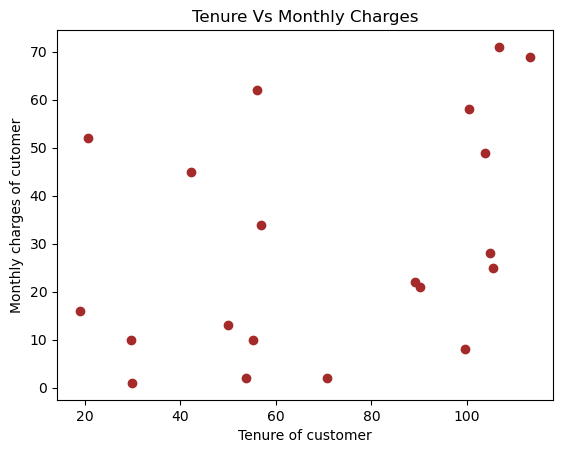

In [24]:
x=data["MonthlyCharges"].head(20)
y=data["tenure"].head(20)
plt.scatter(x,y,color="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly charges of cutomer")
plt.title("Tenure Vs Monthly Charges")

<Axes: xlabel='Contract', ylabel='tenure'>

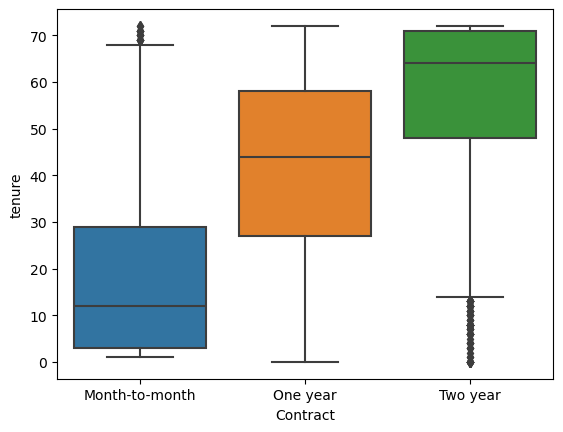

In [25]:
#e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y axis and
#f. Contract on the x axis
sns.boxplot(x=data["Contract"],y=data["tenure"])

In [26]:
# 3. Linear Regression:
# Build a simple linear Model model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
#a. Divide the dataset into train and test sets in 70:30 ratio.
#b. Build the model on train set and predict the values on test set
#c. After predicting the values, find the root mean square error
#d. Find out the error in prediction & store the result in ‘error’
#e. Find the root mean square error

In [27]:
# Before Model Building Check above 2 columns datatype if datatype is object so we need to encode so here no need to encode because this columns data type is numerical
x=pd.DataFrame(data["tenure"])
y=data["MonthlyCharges"]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
x_train

,tenure
3580,9
2364,14
6813,64
789,72
561,3
...,...
4931,15
3264,10
1653,58
2607,1


In [30]:
y_train

3580     72.90
2364     82.65
6813     47.85
789      69.65
561      23.60
         ...  
4931    103.45
3264     91.10
1653     20.75
2607     69.75
2732     20.40
Name: MonthlyCharges, Length: 4930, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(x_train, y_train)


LinearRegression()

In [32]:
predict=LR.predict(x_test)

In [33]:
predict

array([60.95089608, 72.98096699, 59.1903979 , ..., 75.62171426,
       70.63363608, 65.6455579 ])

In [34]:
mse=mean_squared_error(predict,y_test)
rmsc=np.sqrt(mse)
rmsc

29.394584027273893

In [35]:
# Logistic Regression

In [36]:
# Build a simple logistic regression model where dependent variable is
# ‘Churn’ and independent variable is ‘MonthlyCharges’:
# a. Divide the dataset in 65:35 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and get the accuracy score
# d. Build a multiple logistic regression model where dependent variable
# is ‘Churn’ and independent variables are ‘tenure’ and
# ‘MonthlyCharges’
# e. Divide the dataset in 80:20 ratio
# f. Build the model on train set and predict the values on test set
# g. Build the confusion matrix and get the accuracy score
# 5

In [37]:
x=pd.DataFrame(data["MonthlyCharges"])
y=data["Churn"]

In [38]:
x

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.35,random_state=30)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


In [41]:
xtrain

,MonthlyCharges
2843,19.85
5228,44.40
1478,104.70
2941,97.95
1800,43.85
...,...
5260,90.65
500,116.25
3885,74.95
4517,99.55


In [42]:
xtest

,MonthlyCharges
2833,61.15
4420,69.35
775,110.65
6449,19.55
5927,24.75
...,...
5704,86.85
2992,34.00
1631,85.35
3076,56.25


In [43]:
ytrain

2843     No
5228     No
1478    Yes
2941     No
1800     No
       ... 
5260     No
500      No
3885     No
4517    Yes
5925     No
Name: Churn, Length: 4577, dtype: object

In [44]:
ytest

2833     No
4420     No
775      No
6449     No
5927     No
       ... 
5704     No
2992     No
1631    Yes
3076    Yes
3861     No
Name: Churn, Length: 2466, dtype: object

In [45]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [46]:
model=LogisticRegression()

In [47]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [48]:
pred=model.predict(xtest)

In [49]:
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [50]:
s=accuracy_score(pred,ytest)

In [51]:
s

0.7157339821573399

In [52]:
c=confusion_matrix(pred,ytest)

In [53]:
c

array([[1765,  701],
       [   0,    0]], dtype=int64)

In [54]:
data["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
data.shape

(7043, 21)

In [62]:
x=pd.DataFrame(data.loc[:,['MonthlyCharges','tenure']])
y=data["Churn"]


In [72]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [74]:
prd=model1.predict(xtest)
prd

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [75]:
accuracy=accuracy_score(prd,ytest)
accuracy

0.7735982966643009

In [76]:
confusion_matrix(prd,ytest)

array([[934, 212],
       [107, 156]], dtype=int64)

In [ ]:
# Decision Tree
# ● Build a decision tree model where dependent variable is ‘Churn’ and
# independent variable is ‘tenure’:
# a. Divide the dataset in 80:20 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [77]:
x=pd.DataFrame(data["tenure"])
y=data["Churn"]

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [82]:
y_pred=DT.predict(xtest)

In [83]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [84]:
confusion_matrix(y_pred,ytest),accuracy_score(y_pred,ytest)

(array([[965, 281],
        [ 76,  87]], dtype=int64),
 0.7466288147622427)

In [ ]:
# 6. Random Forest:
# ● Build a Random Forest model where dependent variable is ‘Churn’ and
# independent variables are ‘tenure’ and ‘MonthlyCharges’:
# a. Divide the dataset in 70:30 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [86]:
x=pd.DataFrame(data.loc[:,["tenure","MonthlyCharges"]])
y=data["Churn"]

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [91]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [92]:
Pred=RFC.predict(xtest)

In [93]:
confusion_matrix(Pred,ytest),accuracy_score(Pred,ytest)

(array([[1349,  332],
        [ 211,  221]], dtype=int64),
 0.7430194036914339)